### **Project Introduction**

#### **Objective**  
The aim of this project is to provide personalized dietary recommendations based on an individual's nutritional needs. By analyzing the nutrient content of various foods, the planner helps users make informed choices for a balanced diet.

#### **Background and Motivation**  
Maintaining a well-balanced diet is essential for overall health and well-being. However, with the vast array of available food options, it can be challenging for individuals to identify the right foods that align with their dietary requirements. This AI-based dietary planner seeks to address this challenge by leveraging data on food nutrition to recommend meals that meet specific health goals, such as weight management, muscle building, or improving micronutrient intake.

#### **Dataset Overview**  
The dataset used in this project includes detailed nutritional information for a variety of food items. It provides data on:  
- **Calories (`energy_kcal`)**: The energy provided by the food.  
- **Macronutrients**:  
  - Carbohydrates (`carb_g`)  
  - Proteins (`protein_g`)  
  - Fats (`fat_g`)  
- **Fiber and Sugar**:  
  - Fiber (`fibre_g`)  
  - Free Sugar (`freesugar_g`)  
- **Cholesterol**: Measured in milligrams (`cholesterol_mg`).  
- **Micronutrients**:  
  - Calcium (`calcium_mg`)  
  - Iron (`iron_mg`)  
  - Vitamin D (`vitd2_ug`)  
  - Vitamin C (`vitc_mg`)  

This comprehensive dataset enables the creation of a robust dietary planner tailored to individual nutritional requirements.


In [58]:
# STEP 2: Importing Libraries
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set visualization style for better aesthetics
sns.set_style("whitegrid")

# Print confirmation
print("Libraries imported successfully!")

Libraries imported successfully!


In [59]:
# 3. Loading the Dataset

# Load the dataset into a pandas DataFrame
file_path = "food_data.xlsx"  # Ensure the file is in the working directory
df = pd.read_excel(file_path)

# Display the first few rows of the dataset in an aesthetic way
from IPython.display import display

print("Preview of the Dataset:")
display(df.head())

# Get a summary of the dataset (columns, data types, non-null counts)
print("\nDataset Info:")
df.info()

# Display the shape of the dataset
print("\nShape of the dataset (rows, columns):")
print(df.shape)


Preview of the Dataset:


,food_code,food_name,food_group_nin,energy_kcal,carb_g,protein_g,fat_g,freesugar_g,fibre_g,cholesterol_mg,calcium_mg,iron_mg,vitd2_ug,vitc_mg
0,A001,"Amaranth seed, black (Amaranthus cruentus)",Cereals and millets,356.110,59.98,14.59,5.74,0.88,7.02,0.0,181.00,9.33,58.67,0.0
1,A002,"Amaranth seed, pale brown (Amaranthus cruentus)",Cereals and millets,355.871,61.46,13.27,5.56,0.80,7.47,0.0,162.00,8.02,53.98,0.0
2,A003,Bajra (Pennisetum typhoideum),Cereals and millets,347.984,61.78,10.96,5.43,0.81,11.49,0.0,27.35,6.42,5.65,0.0
3,A004,Barley (Hordeum vulgare),Cereals and millets,315.719,61.29,10.94,1.30,0.06,15.64,0.0,28.64,1.56,0.00,0.0
4,A005,Jowar (Sorghum vulgare),Cereals and millets,334.122,67.68,9.97,1.73,1.27,10.22,0.0,27.60,3.95,3.96,0.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   food_code       2109 non-null   object 
 1   food_name       2109 non-null   object 
 2   food_group_nin  1789 non-null   object 
 3   energy_kcal     2109 non-null   float64
 4   carb_g          2109 non-null   float64
 5   protein_g       2109 non-null   float64
 6   fat_g           2109 non-null   float64
 7   freesugar_g     2109 non-null   float64
 8   fibre_g         2109 non-null   float64
 9   cholesterol_mg  2109 non-null   float64
 10  calcium_mg      2109 non-null   float64
 11  iron_mg         2109 non-null   float64
 12  vitd2_ug        2109 non-null   float64
 13  vitc_mg         2109 non-null   float64
dtypes: float64(11), object(3)
memory usage: 230.8+ KB

Shape of the dataset (rows, columns):
(2109, 14)


In [60]:
# Step 4: Handling Missing Values

# Identify missing data by counting NaNs in each column
missing_data = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_data)

# Strategy for handling missing values
# Drop rows or columns with excessive missing values, if necessary
df = df.dropna(axis=0, thresh=int(0.8 * df.shape[1]))  # Example threshold: retain rows with at least 80% non-NA values

# Impute missing values for numeric columns (using mean here as an example)
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values handled successfully.")


Missing Values in Each Column:
food_code           0
food_name           0
food_group_nin    320
energy_kcal         0
carb_g              0
protein_g           0
fat_g               0
freesugar_g         0
fibre_g             0
cholesterol_mg      0
calcium_mg          0
iron_mg             0
vitd2_ug            0
vitc_mg             0
dtype: int64

Missing values handled successfully.


In [61]:
# Step 5: Initial Data Exploration

# Display column names, data types, and unique values per column
print("Column Information:")
print(df.dtypes)

# Dataset Summary
num_rows, num_cols = df.shape
print(f"\nDataset contains {num_rows} rows and {num_cols} columns.")

# Display unique values in each column if applicable
print("\nUnique values per column (for categorical fields or low-cardinality columns):")
for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values < 20:  # Set a threshold for "unique" count to display
        print(f"{col}: {unique_values} unique values")


Column Information:
food_code          object
food_name          object
food_group_nin     object
energy_kcal       float64
carb_g            float64
protein_g         float64
fat_g             float64
freesugar_g       float64
fibre_g           float64
cholesterol_mg    float64
calcium_mg        float64
iron_mg           float64
vitd2_ug          float64
vitc_mg           float64
dtype: object

Dataset contains 2109 rows and 14 columns.

Unique values per column (for categorical fields or low-cardinality columns):


In [62]:
# Step 6: Data Cleaning

# Remove Duplicates
initial_row_count = df.shape[0]
df.drop_duplicates(inplace=True)
final_row_count = df.shape[0]
print(f"Removed {initial_row_count - final_row_count} duplicate rows.")

# Correct Inconsistencies: Standardize units if necessary (assuming some columns may need unit correction)
# Example: If any nutrient columns have inconsistent units, you would convert them here.
# For now, we will check the columns for any potential typos or anomalies.

# Outlier Handling
# Identify outliers in nutrient values if relevant (using Z-score as an example)
from scipy.stats import zscore

# Calculate Z-scores for numeric columns to detect outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_cols]))

# Setting a threshold for Z-score (e.g., 3) to identify and potentially handle outliers
outliers = (z_scores > 3).any(axis=1)
outliers_count = outliers.sum()
print(f"Identified {outliers_count} potential outliers.")

# Optionally, remove or handle outliers (e.g., cap extreme values or drop rows)
df = df[~outliers]
print(f"Removed {outliers_count} rows containing outliers.")

print("\nData cleaning completed successfully.")

Removed 0 duplicate rows.
Identified 334 potential outliers.
Removed 334 rows containing outliers.

Data cleaning completed successfully.


In [63]:
# Step 7: Data Transformation

# Normalization: Scale numeric features to bring them to a common range
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns for normalization
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Initialize the scaler and apply it to the numeric columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Numeric features normalized successfully.")

# Encoding Categorical Variables: Encode food group information if needed
# Assuming 'Food Group' is a categorical column (replace with the actual column name if different)
categorical_cols = df.select_dtypes(include=[object]).columns
if len(categorical_cols) > 0:
    print(f"\nEncoding the following categorical columns: {categorical_cols.tolist()}")
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
else:
    print("\nNo categorical columns found for encoding.")

print("Data transformation completed successfully.")

Numeric features normalized successfully.

Encoding the following categorical columns: ['food_code', 'food_name', 'food_group_nin']
Data transformation completed successfully.


SUMMARY STATISTICS:
            carb_g    protein_g        fat_g  freesugar_g      fibre_g  \
count  1775.000000  1775.000000  1775.000000  1775.000000  1775.000000   
mean      0.192012     0.207944     0.124131     0.117633     0.116373   
std       0.219881     0.205653     0.182942     0.194337     0.152317   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.040199     0.052786     0.009704     0.000000     0.000234   
50%       0.108408     0.125255     0.053510     0.031570     0.070860   
75%       0.267044     0.288493     0.161441     0.130920     0.152876   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       cholesterol_mg   calcium_mg      iron_mg     vitd2_ug      vitc_mg  \
count     1775.000000  1775.000000  1775.000000  1775.000000  1775.000000   
mean         0.069289     0.070439     0.060343     0.061481     0.063871   
std          0.137300     0.110381     0.106008     0.115164     0.129310   
min  

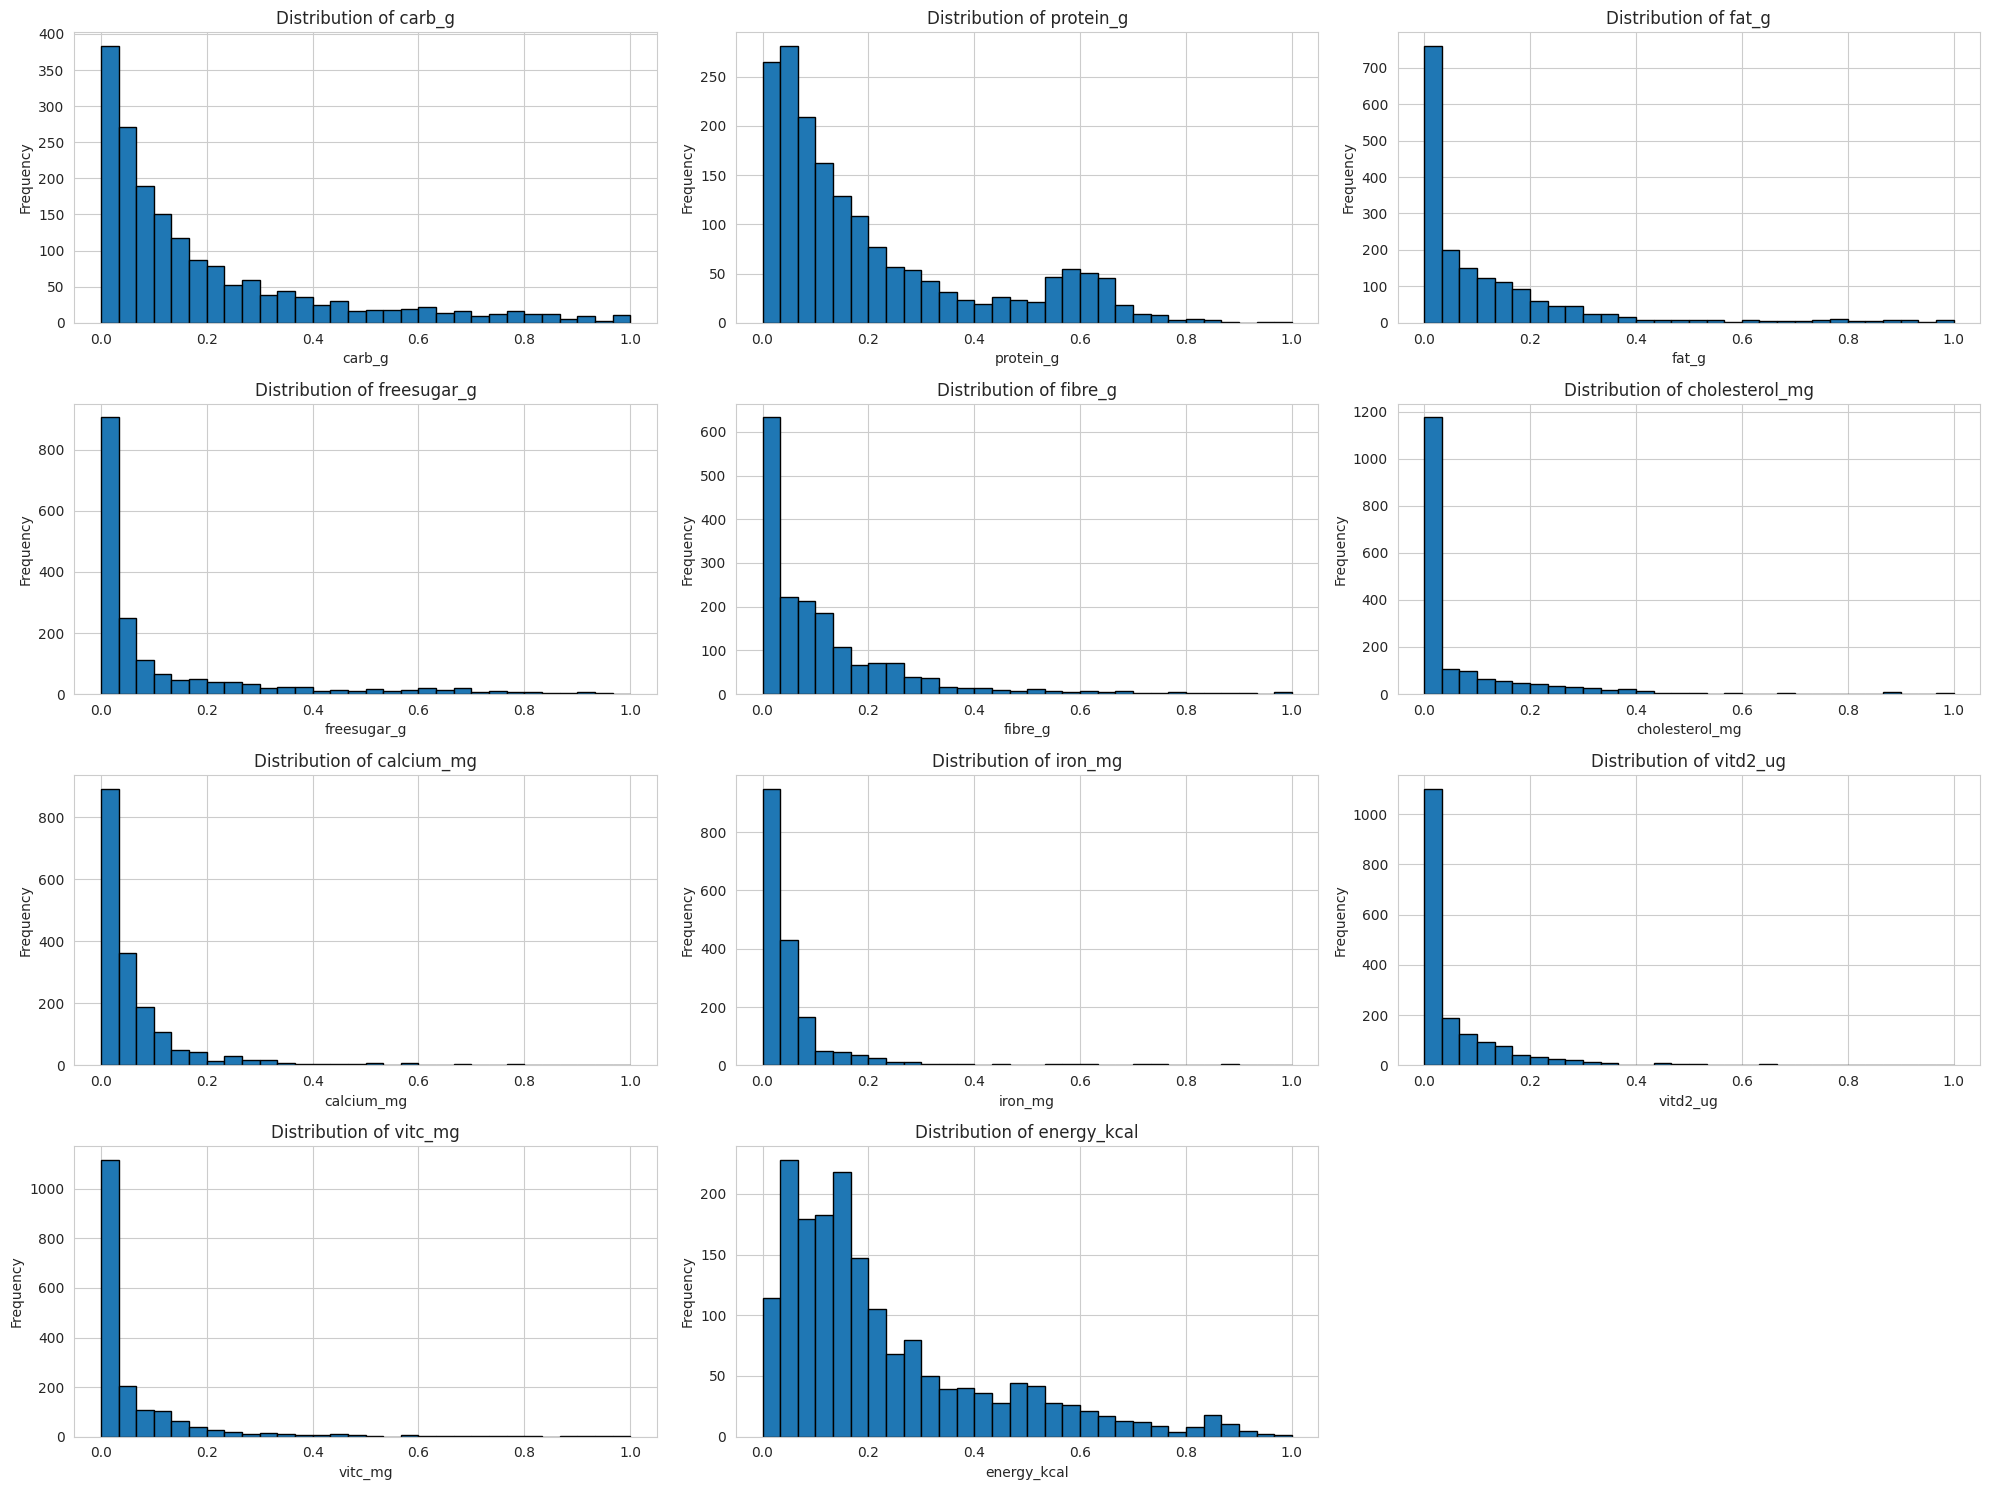

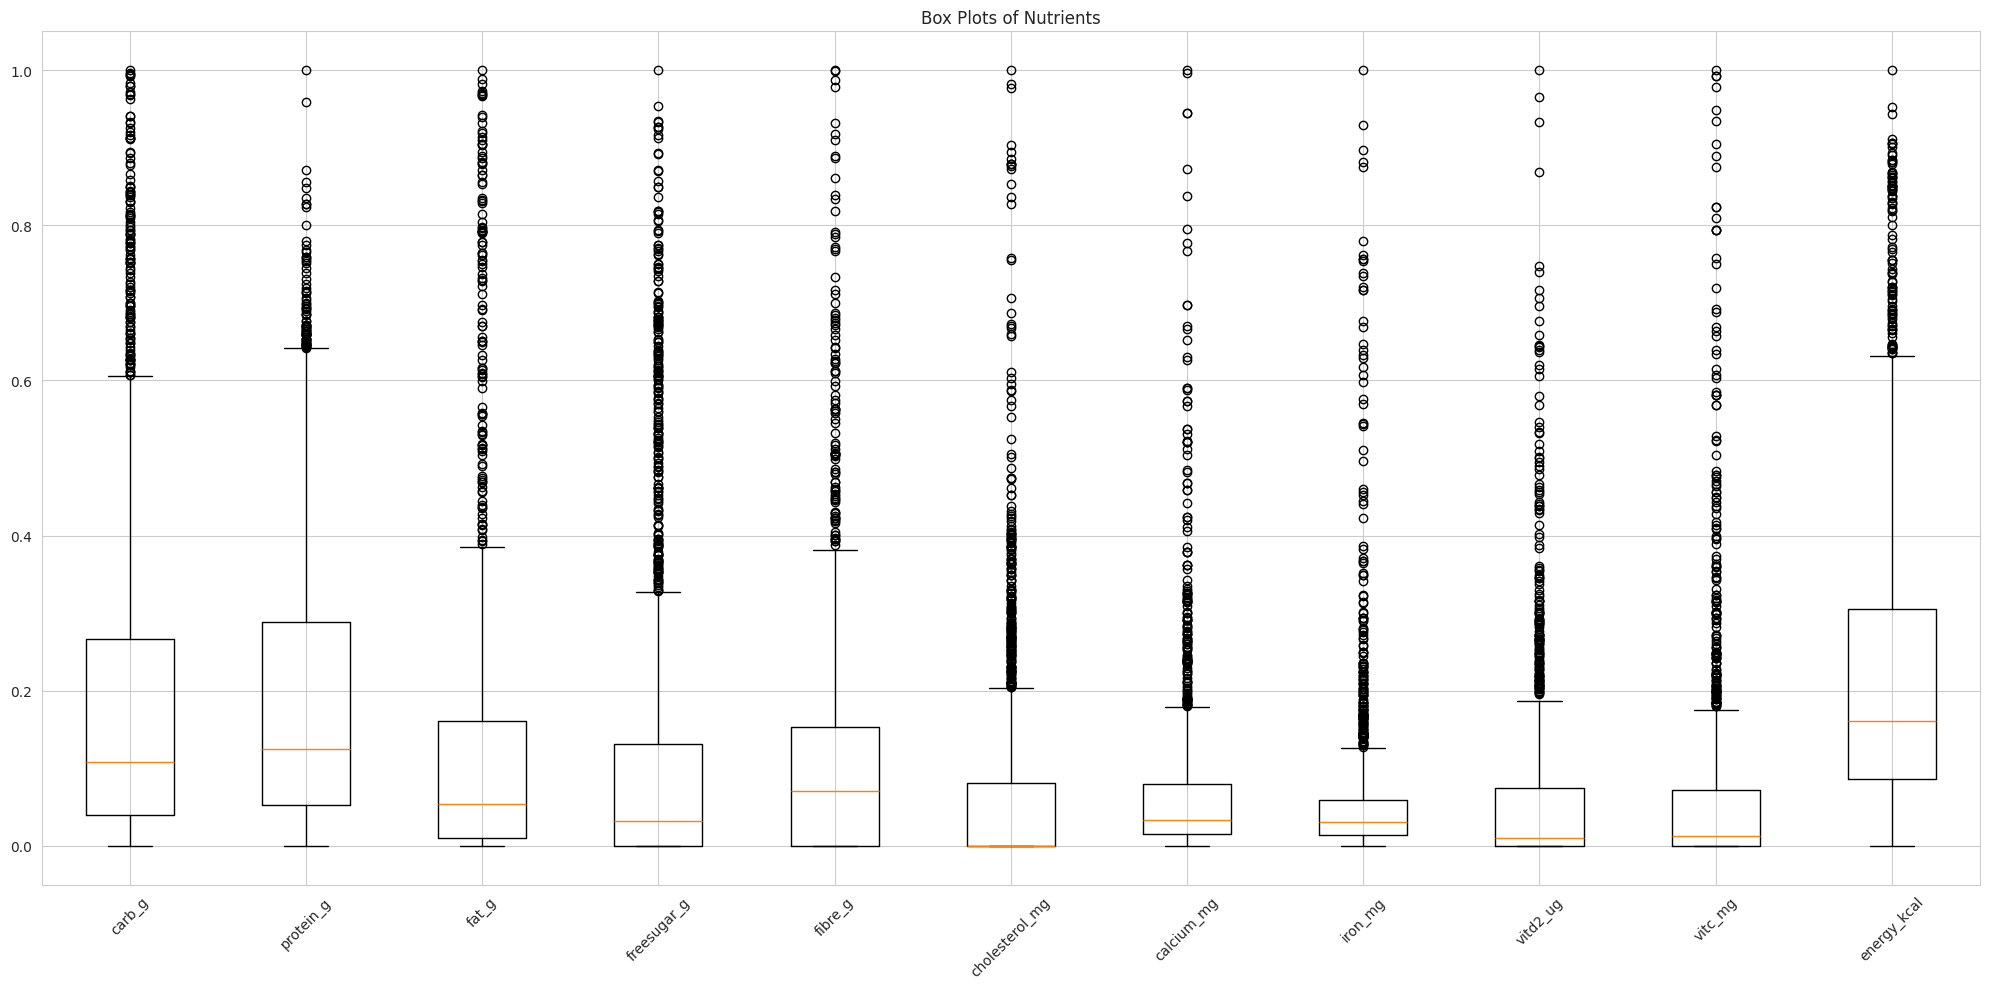

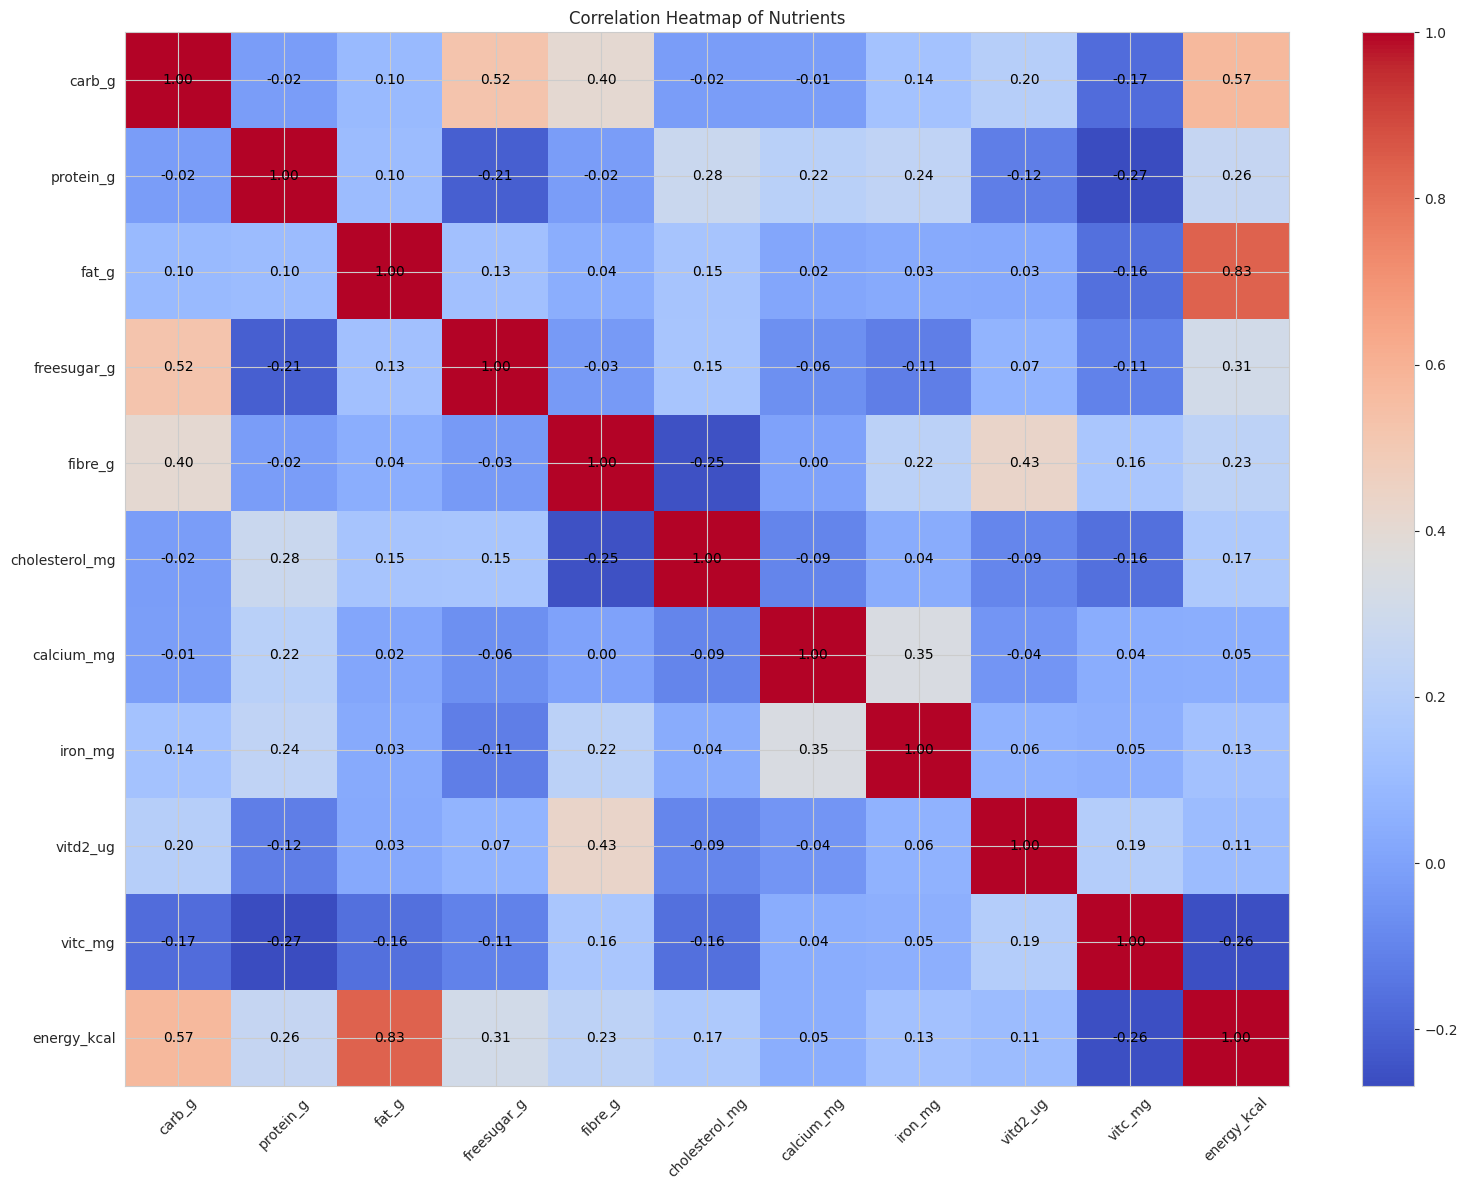


OUTLIER ANALYSIS:
carb_g:
  Outliers: 136 (7.66%)
protein_g:
  Outliers: 80 (4.51%)
fat_g:
  Outliers: 123 (6.93%)
freesugar_g:
  Outliers: 219 (12.34%)
fibre_g:
  Outliers: 101 (5.69%)
cholesterol_mg:
  Outliers: 218 (12.28%)
calcium_mg:
  Outliers: 152 (8.56%)
iron_mg:
  Outliers: 188 (10.59%)
vitd2_ug:
  Outliers: 157 (8.85%)
vitc_mg:
  Outliers: 172 (9.69%)
energy_kcal:
  Outliers: 99 (5.58%)


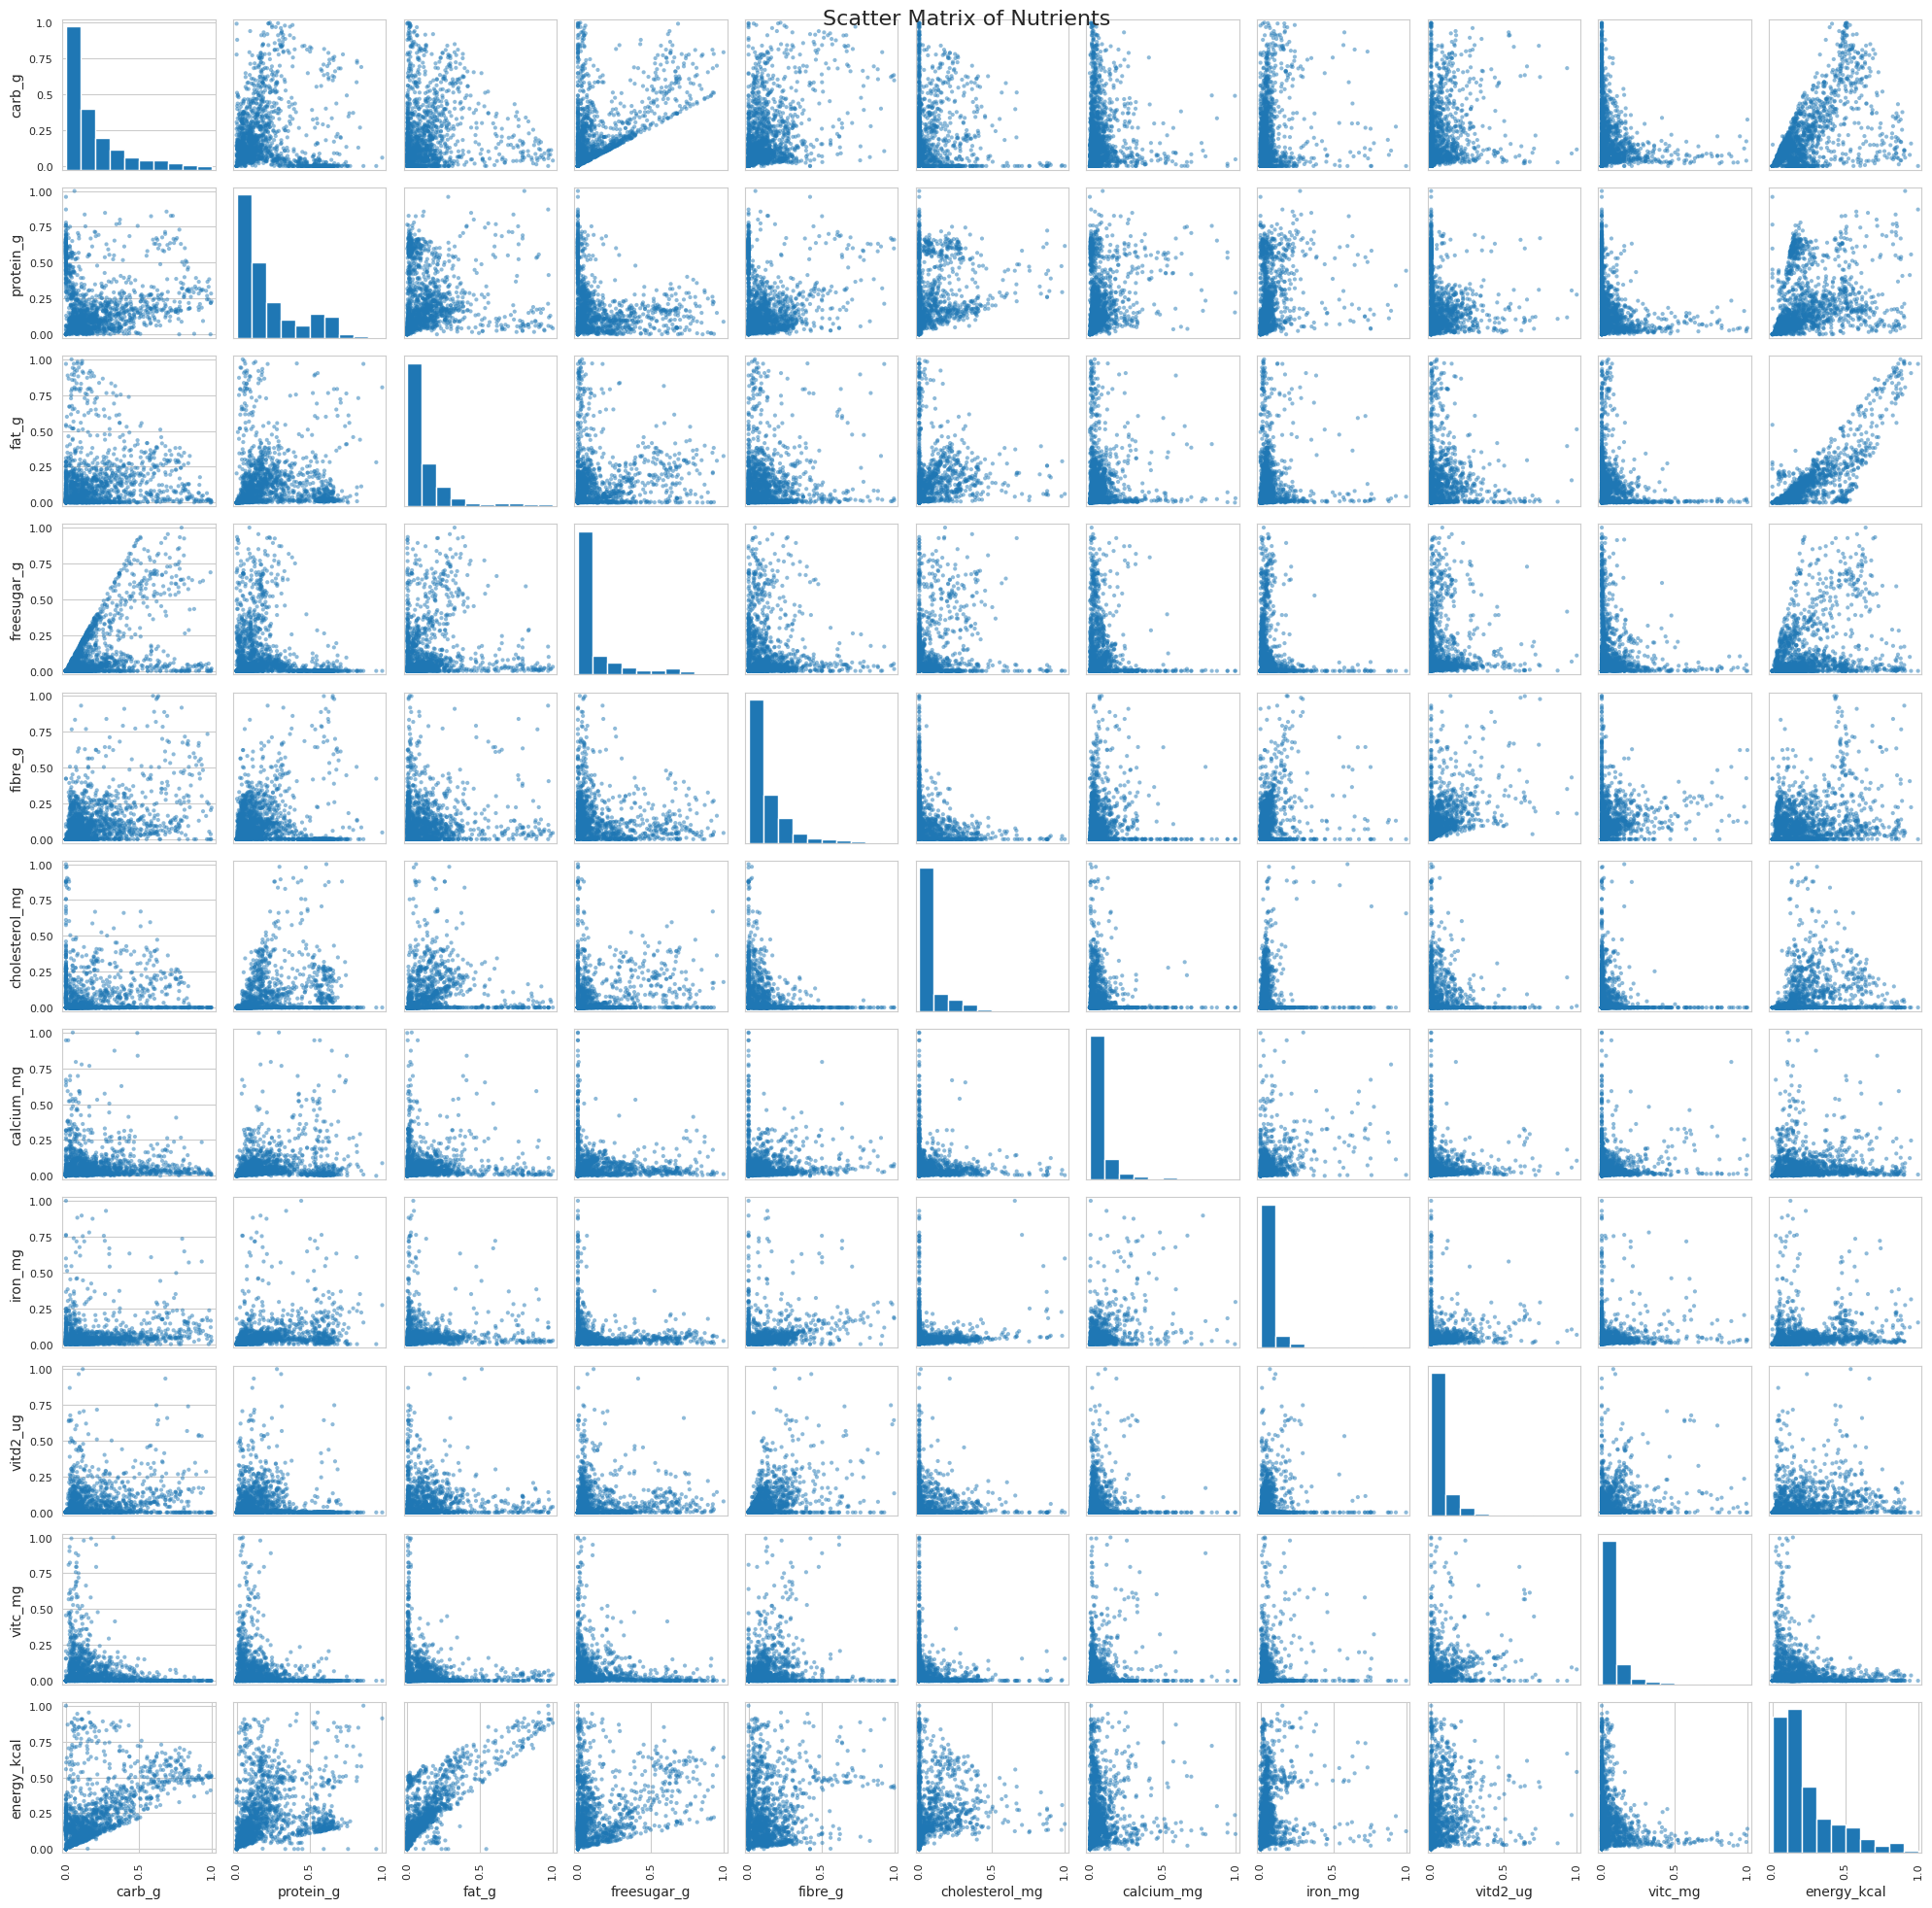

In [64]:
#STEP 9:Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Disable potential style conflicts
plt.rcParams.update({'figure.max_open_warning': 0})

# Define the columns for analysis
numeric_columns = [
    'carb_g', 'protein_g', 'fat_g',
    'freesugar_g', 'fibre_g',
    'cholesterol_mg', 'calcium_mg',
    'iron_mg', 'vitd2_ug', 'vitc_mg',
    'energy_kcal'
]

# 1. Summary Statistics
def summary_statistics(df):
    print("SUMMARY STATISTICS:")
    summary = df[numeric_columns].describe()
    print(summary)
    return summary

# 2. Distribution Plots
def create_distribution_plots(df):
    # Set up the plot
    plt.figure(figsize=(20, 15))

    # Create histograms for each numeric column
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(4, 3, i)
        # Use plt.hist instead of sns.histplot if there are compatibility issues
        plt.hist(df[column], bins=30, edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# 3. Box Plots
def create_box_plots(df):
    plt.figure(figsize=(20, 10))

    # Create box plots for each numeric column
    plt.boxplot([df[column] for column in numeric_columns], labels=numeric_columns)
    plt.title('Box Plots of Nutrients')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Correlation Analysis
def correlation_analysis(df):
    # Compute the correlation matrix
    correlation_matrix = df[numeric_columns].corr()

    # Create a heatmap
    plt.figure(figsize=(16, 12))
    plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=45)
    plt.yticks(range(len(numeric_columns)), numeric_columns)
    plt.title('Correlation Heatmap of Nutrients')

    # Add correlation values to the heatmap
    for i in range(len(numeric_columns)):
        for j in range(len(numeric_columns)):
            plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                     ha='center', va='center', color='black')

    plt.tight_layout()
    plt.show()

    return correlation_matrix

# 5. Outlier Detection
def detect_outliers(df):
    outliers = {}
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers[column] = {
            'count': len(column_outliers),
            'percentage': (len(column_outliers) / len(df)) * 100
        }

    print("\nOUTLIER ANALYSIS:")
    for column, stats in outliers.items():
        print(f"{column}:")
        print(f"  Outliers: {stats['count']} ({stats['percentage']:.2f}%)")

# 6. Scatter Plot Matrix
def create_scatter_matrix(df):
    pd.plotting.scatter_matrix(df[numeric_columns],
                                figsize=(20, 20),
                                diagonal='hist')
    plt.suptitle('Scatter Matrix of Nutrients', fontsize=16)
    plt.tight_layout()
    plt.show()

# Execute the EDA functions
def perform_eda(df):
    # 1. Summary Statistics
    summary = summary_statistics(df)

    # 2. Distribution Plots
    create_distribution_plots(df)

    # 3. Box Plots
    create_box_plots(df)

    # 4. Correlation Analysis
    correlation_matrix = correlation_analysis(df)

    # 5. Outlier Detection
    detect_outliers(df)

    # 6. Scatter Matrix
    create_scatter_matrix(df)

# Run the EDA
perform_eda(df)


Feature Importance from Random Forest:
                 Feature  Importance
10  total_macronutrients    0.811827
2                  fat_g    0.146470
0                 carb_g    0.019540
7                iron_mg    0.006348
1              protein_g    0.006015
5         cholesterol_mg    0.002705
6             calcium_mg    0.001982
4                fibre_g    0.001741
3            freesugar_g    0.001656
8               vitd2_ug    0.001011
9                vitc_mg    0.000705

Mutual Information Scores:
                 Feature  Mutual Information
10  total_macronutrients            1.494968
2                  fat_g            0.856576
0                 carb_g            0.665361
1              protein_g            0.415201
3            freesugar_g            0.315352
5         cholesterol_mg            0.256770
9                vitc_mg            0.200953
4                fibre_g            0.194528
7                iron_mg            0.186155
8               vitd2_ug            0.

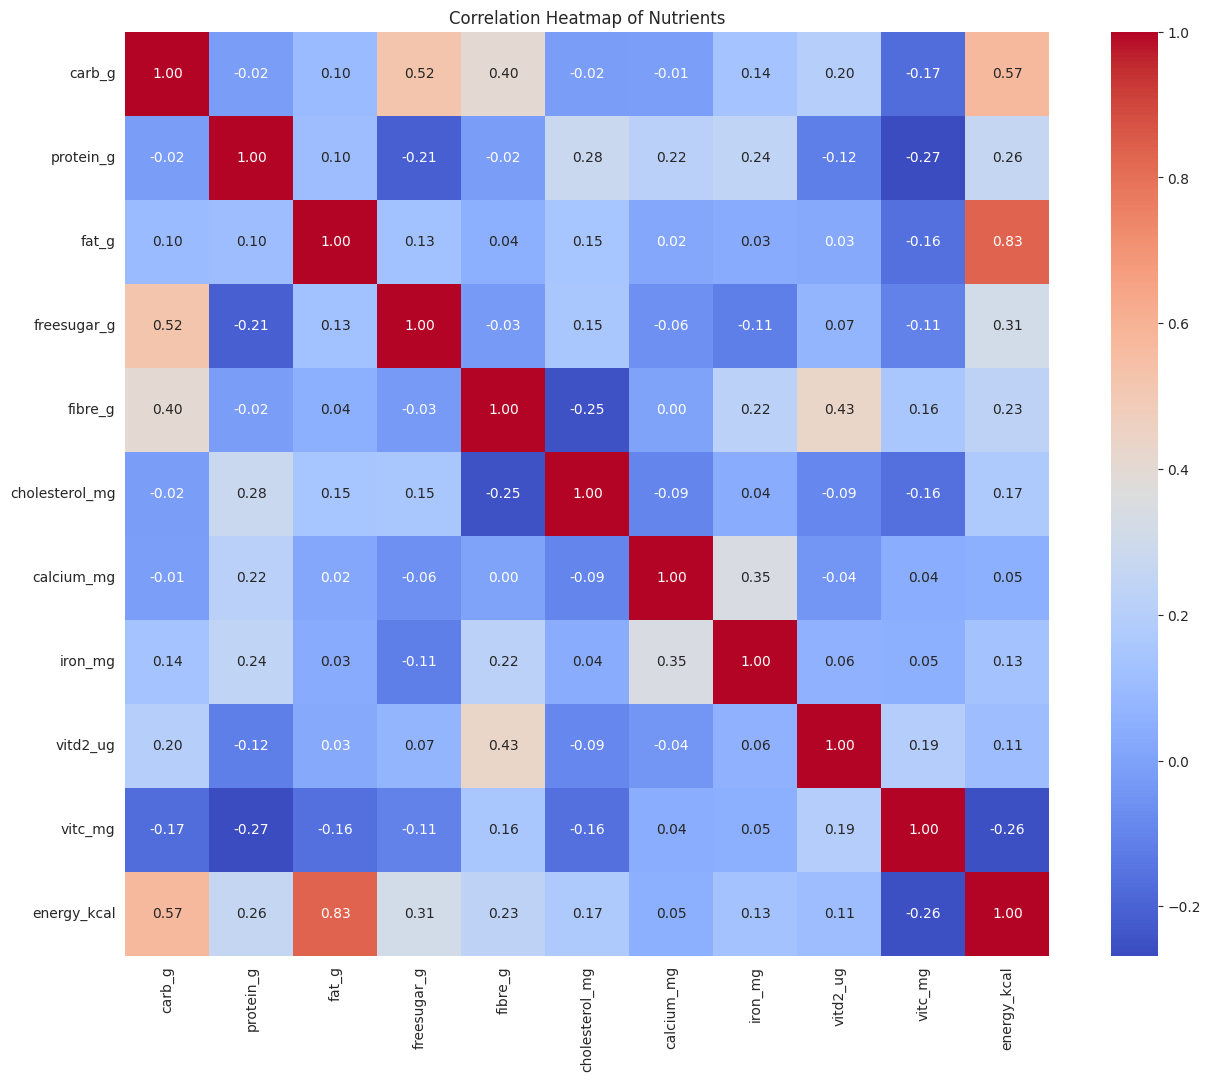


Highly Correlated Features (threshold > 0.8):
{'energy_kcal'}


In [65]:
#STEP 10:Feature Engineering
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame loaded with the dataset
# Define the columns for analysis
numeric_columns = [
    'carb_g', 'protein_g', 'fat_g',
    'freesugar_g', 'fibre_g',
    'cholesterol_mg', 'calcium_mg',
    'iron_mg', 'vitd2_ug', 'vitc_mg',
    'energy_kcal'
]

# 1. New Feature Creation
def create_new_features(df):
    df['total_macronutrients'] = df['protein_g'] + df['carb_g'] + df['fat_g']
    return df

# 2. Feature Selection using Random Forest
def feature_importance_selection(X, y):
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    importance = model.feature_importances_

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    return feature_importance_df

# 3. Feature Selection using Mutual Information
def mutual_information_selection(X, y):
    mi = mutual_info_regression(X, y)
    mi_df = pd.DataFrame({
        'Feature': X.columns,
        'Mutual Information': mi
    }).sort_values(by='Mutual Information', ascending=False)

    return mi_df

# 4. Correlation Analysis for Feature Selection
def correlation_analysis_for_selection(df):
    correlation_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Correlation Heatmap of Nutrients')
    plt.show()

    return correlation_matrix

# Execute Feature Engineering
def perform_feature_engineering(df):
    # Step 1: Create new features
    df = create_new_features(df)

    # Step 2: Prepare data for feature selection
    feature_columns = [
        'carb_g', 'protein_g', 'fat_g',
        'freesugar_g', 'fibre_g',
        'cholesterol_mg', 'calcium_mg',
        'iron_mg', 'vitd2_ug', 'vitc_mg',
        'total_macronutrients'
    ]

    X = df[feature_columns]
    y = df['energy_kcal']

    # Step 3: Feature Selection using Random Forest
    importance_df = feature_importance_selection(X, y)
    print("\nFeature Importance from Random Forest:")
    print(importance_df)

    # Step 4: Feature Selection using Mutual Information
    mi_df = mutual_information_selection(X, y)
    print("\nMutual Information Scores:")
    print(mi_df)

    # Step 5: Correlation Analysis
    correlation_matrix = correlation_analysis_for_selection(df)

    # Step 6: Identify highly correlated features
    # Set a threshold for correlation
    threshold = 0.8
    correlated_features = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)

    print("\nHighly Correlated Features (threshold > 0.8):")
    print(correlated_features)

# Run the feature engineering process
perform_feature_engineering(df)

Dataset Splitting Summary:
Total Dataset Size: 1775 samples
Training Set Size: 1420 samples
Testing Set Size: 355 samples


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


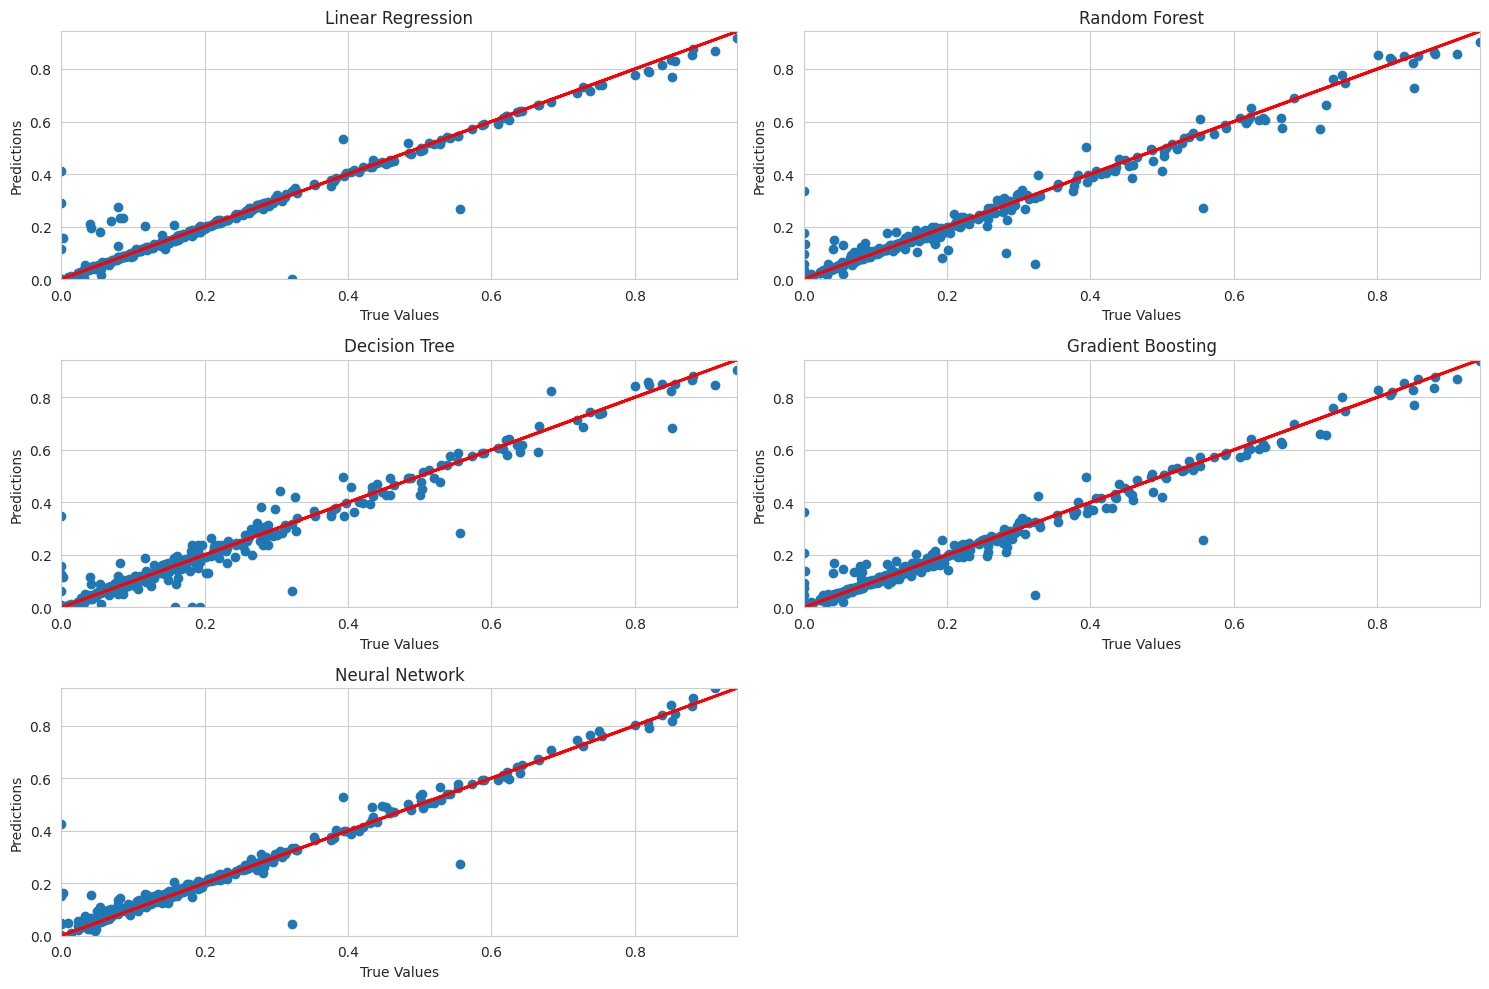

In [66]:
#Model Implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from keras.models import Sequential
from keras.layers import Dense

# STEP 8: Data Splitting
# Select features (all columns except the target)
feature_columns = [
    'carb_g', 'protein_g', 'fat_g',
    'freesugar_g', 'fibre_g',
    'cholesterol_mg', 'calcium_mg',
    'iron_mg', 'vitd2_ug', 'vitc_mg'
]

# Target variable
target_column = 'energy_kcal'

# Extract features and target
X = df[feature_columns]
y = df[target_column]

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% for testing
    random_state=42      # Reproducibility
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns)

# Print split information
print("Dataset Splitting Summary:")
print(f"Total Dataset Size: {df.shape[0]} samples")
print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Testing Set Size: {X_test.shape[0]} samples")

# Model Training
# 1. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_lr = linear_reg.predict(X_test_scaled)

# 2. Random Forest
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)

# 3. Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree.predict(X_test_scaled)

# 4. Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# 5. Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=0)
y_pred_nn = model.predict(X_test_scaled)

# Visualization of Results
plt.figure(figsize=(15, 10))

# True vs Predicted for each model
models = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Decision Tree': y_pred_dt,
    'Gradient Boosting': y_pred_gb,
    'Neural Network': y_pred_nn.flatten()  # Flatten for compatibility
}

for i, (model_name, predictions) in enumerate(models.items()):
    plt.subplot(3, 2, i + 1)
    plt.scatter(y_test, predictions)
    plt.plot(y_test, y_test, color='red', linewidth=2)  # Line for perfect predictions
    plt.title(model_name)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.xlim([min(y_test), max(y_test)])
    plt.ylim([min(y_test), max(y_test)])

plt.tight_layout()
plt.show()


Metrics for energy_kcal:
--------------------------------------------------

Linear Regression:
MAE: 0.0143
RMSE: 0.0449
R² Score: 0.9508
Accuracy (within 15%): 91.55%

Random Forest:
MAE: 0.0180
RMSE: 0.0401
R² Score: 0.9608
Accuracy (within 15%): 85.92%

Decision Tree:
MAE: 0.0215
RMSE: 0.0424
R² Score: 0.9562
Accuracy (within 15%): 75.77%

Gradient Boosting:
MAE: 0.0170
RMSE: 0.0376
R² Score: 0.9656
Accuracy (within 15%): 85.63%

Polynomial Regression:
MAE: 0.0174
RMSE: 0.0410
R² Score: 0.9591
Accuracy (within 15%): 80.28%


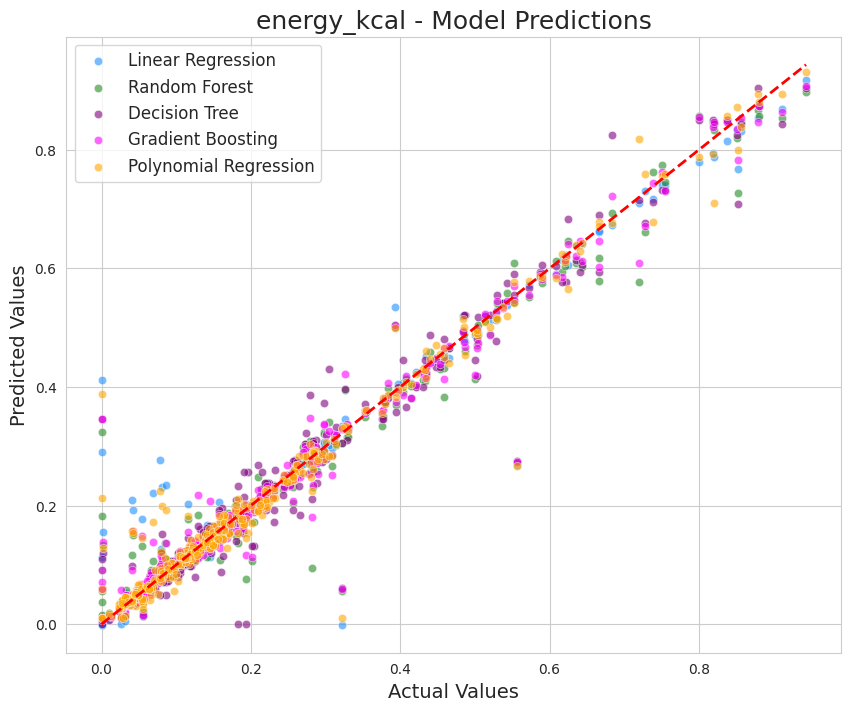

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Define your features and target columns
feature_list = [
    'carb_g', 'protein_g', 'fat_g',
    'freesugar_g', 'fibre_g',
    'cholesterol_mg', 'calcium_mg',
    'iron_mg', 'vitd2_ug', 'vitc_mg'
]
target_columns = ['energy_kcal']  # Adjust this to your target columns

# Hyperparameter grids for each model
param_grids = {
    'RandomForestRegressor': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'DecisionTreeRegressor': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }
}

def calculate_metrics(y_true, y_pred):
    """Calculate various regression metrics"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    # Calculate accuracy within 15% tolerance
    tolerance = 0.15
    within_tolerance = np.abs(y_true - y_pred) <= (tolerance * np.abs(y_true))
    accuracy = np.mean(within_tolerance)

    return mae, rmse, r2, accuracy

# Loop for each target feature to perform hyperparameter tuning and plot
results = {}
metrics_results = {}

for target_feature in target_columns:
    # Define features and target for the current loop
    features = df[feature_list]
    target = df[target_feature]

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Dictionary to store metrics for current feature
    feature_metrics = {}

    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    y_pred_lr = linear_reg.predict(X_test)
    feature_metrics['Linear Regression'] = calculate_metrics(y_test, y_pred_lr)

    # Random Forest with RandomizedSearchCV
    rf = RandomForestRegressor(random_state=42)
    rf_search = RandomizedSearchCV(rf, param_grids['RandomForestRegressor'], n_iter=10, cv=3, random_state=42)
    rf_search.fit(X_train, y_train)
    y_pred_rf = rf_search.best_estimator_.predict(X_test)
    feature_metrics['Random Forest'] = calculate_metrics(y_test, y_pred_rf)

    # Decision Tree with RandomizedSearchCV
    dt = DecisionTreeRegressor(random_state=42)
    dt_search = RandomizedSearchCV(dt, param_grids['DecisionTreeRegressor'], n_iter=10, cv=3, random_state=42)
    dt_search.fit(X_train, y_train)
    y_pred_dt = dt_search.best_estimator_.predict(X_test)
    feature_metrics['Decision Tree'] = calculate_metrics(y_test, y_pred_dt)

        # Gradient Boosting with RandomizedSearchCV
    gb = GradientBoostingRegressor(random_state=42)
    gb_search = RandomizedSearchCV(gb, param_grids['GradientBoostingRegressor'], n_iter=10, cv=3, random_state=42)
    gb_search.fit(X_train, y_train)
    y_pred_gb = gb_search.best_estimator_.predict(X_test)
    feature_metrics['Gradient Boosting'] = calculate_metrics(y_test, y_pred_gb)

    # Polynomial Regression with PolynomialFeatures
    poly = PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)
    y_pred_poly = poly_reg.predict(X_poly_test)
    feature_metrics['Polynomial Regression'] = calculate_metrics(y_test, y_pred_poly)

    # Store predictions for plotting
    results[target_feature] = {
        'Actual': y_test,
        'Linear Regression': y_pred_lr,
        'Random Forest': y_pred_rf,
        'Decision Tree': y_pred_dt,
        'Gradient Boosting': y_pred_gb,
        'Polynomial Regression': y_pred_poly
    }

    # Store metrics
    metrics_results[target_feature] = feature_metrics

    # Print metrics for current feature
    print(f"\nMetrics for {target_feature}:")
    print("-" * 50)
    for model, metrics in feature_metrics.items():
        print(f"\n{model}:")
        print(f"MAE: {metrics[0]:.4f}")
        print(f"RMSE: {metrics[1]:.4f}")
        print(f"R² Score: {metrics[2]:.4f}")
        print(f"Accuracy (within 15%): {metrics[3]*100:.2f}%")

# Plotting
for feature, predictions in results.items():
    df = pd.DataFrame(predictions)

    plt.figure(figsize=(10, 8))

    # Plot each model's predictions against the actual values
    sns.scatterplot(data=df, x='Actual', y='Linear Regression', color="dodgerblue", label="Linear Regression", alpha=0.6)
    sns.scatterplot(data=df, x='Actual', y='Random Forest', color="forestgreen", label="Random Forest", alpha=0.6)
    sns.scatterplot(data=df, x='Actual', y='Decision Tree', color="purple", label="Decision Tree", alpha=0.6)
    sns.scatterplot(data=df, x='Actual', y='Gradient Boosting', color="magenta", label="Gradient Boosting", alpha=0.6)
    sns.scatterplot(data=df, x='Actual', y='Polynomial Regression', color="orange", label="Polynomial Regression", alpha=0.6)

    # Reference line for perfect predictions
    plt.plot([df['Actual'].min(), df['Actual'].max()], [df['Actual'].min(), df['Actual'].max()], 'r--', linewidth=2)

    # Titles and labels
    plt.title(f"{feature} - Model Predictions", fontsize=18)
    plt.xlabel("Actual Values", fontsize=14)
    plt.ylabel("Predicted Values", fontsize=14)
    plt.legend(fontsize=12, loc='upper left')

    plt.show()

In [68]:
import pandas as pd
import numpy as np

class PersonalizedDietRecommender:
    def __init__(self, dataset):
        self.dataset = dataset

    def recommend_meals_from_dataset(self, diet_type, meal_category):
        """
        Directly recommend meals from the dataset based on diet type and meal category.
        """
        # Filter dataset based on diet type and meal category
        filtered_meals = self.dataset[
            (self.dataset['food_group_nin'].str.contains(diet_type, case=False)) &
            (self.dataset['food_group_nin'].str.contains(meal_category, case=False))
        ]

        # If no meals found, return all meals
        if filtered_meals.empty:
            filtered_meals = self.dataset

        # Select random meals for variety (7 meals max)
        recommended_meals = filtered_meals.sample(min(7, len(filtered_meals)), replace=False)

        return recommended_meals[['food_name', 'energy_kcal', 'protein_g', 'fat_g']]

    def generate_weekly_meal_plan(self, user_profile):
        """
        Generate a weekly meal plan (Monday to Sunday) with recommendations for each day.
        """
        diet_type = user_profile['diet_type']

        # Define meal categories for the week (Including Snacks)
        meal_categories = {
            'Breakfast': 'Breakfast',
            'Morning Snack': 'Snack',
            'Lunch': 'Lunch',
            'Afternoon Snack': 'Snack',
            'Dinner': 'Dinner',
            'Dessert': 'Dessert'
        }

        # Generate meal plan for the week
        weekly_meal_plan = {}

        for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
            weekly_meal_plan[day] = {
                meal_type: self.recommend_meals_from_dataset(diet_type, category).iloc[0]
                for meal_type, category in meal_categories.items()
            }

        return weekly_meal_plan

    def display_weekly_meal_plan(self, weekly_meal_plan):
        """
        Display the weekly meal plan.
        """
        print("\n🌟 Weekly Meal Plan 🌟")
        for day, meals in weekly_meal_plan.items():
            print(f"\n{day.upper()}:")
            for meal_type, meal in meals.items():
                print(f"  {meal_type}: {meal['food_name']} (Energy: {meal['energy_kcal']} kcal, Protein: {meal['protein_g']} g, Fat: {meal['fat_g']} g)")
            print("-" * 50)

    def get_user_inputs(self):
        """
        Collect comprehensive user inputs.
        """
        print("🌟 Personalized Diet Recommendation System 🌟")

        # Basic Information
        name = input("Enter your name: ")
        age = int(input("Enter your age: "))

        # Gender Input with Options
        gender = input("Enter your gender (male/female): ")
        while gender.lower() not in ['male', 'female']:
            gender = input("Invalid input. Please enter 'Male' or 'Female': ")

        # Physical Measurements
        weight = float(input("Enter your weight in kg: "))
        height = float(input("Enter your height in cm: "))

        # Dietary Preferences
        print("\nDietary Preferences:")
        diet_type = input("Select diet type (Veg/Non-Veg/Mixed): ")
        while diet_type.lower() not in ['veg', 'non-veg', 'mixed']:
            diet_type = input("Invalid input. Please enter 'Veg', 'Non-Veg', or 'Mixed': ")

        activity_level = input("Activity Level (Sedentary/Lightly active/Moderately Active/Very Active): ")
        while activity_level.lower() not in ['sedentary', 'lightly active', 'moderately active', 'very active']:
            activity_level = input("Invalid input. Please enter 'Sedentary', 'Lightly Active', 'Moderately Active', or 'Very Active': ")

        diet_goal = input("Diet Goal (Weight Loss/Weight Gain/Eat Healthy/Maintain Weight): ")
        while diet_goal.lower() not in ['weight loss', 'weight gain', 'eat healthy', 'maintain weight']:
            diet_goal = input("Invalid input. Please enter 'Weight Loss', 'Weight Gain', 'Eat Healthy', or 'Maintain Weight': ")

        return {
            'name': name,
            'age': age,
            'gender': gender,
            'weight': weight,
            'height': height,
            'diet_type': diet_type,
            'activity_level': activity_level,
            'diet_goal': diet_goal
        }

def main():
    # Load your dataset (adjust the path as necessary)
    df = pd.read_excel('food_data.xlsx')  # Ensure this CSV has the required columns

    # Check the columns in the DataFrame
    print("Columns in the dataset:", df.columns)

    # Create recommender instance with loaded dataset
    recommender = PersonalizedDietRecommender(df)

    # Get user inputs
    user_profile = recommender.get_user_inputs()

    # Generate weekly meal plan
    weekly_meal_plan = recommender.generate_weekly_meal_plan(user_profile)

    # Display weekly meal plan
    recommender.display_weekly_meal_plan(weekly_meal_plan)

if __name__ == "__main__":
    main()

Columns in the dataset: Index(['food_code', 'food_name', 'food_group_nin', 'energy_kcal', 'carb_g',
       'protein_g', 'fat_g', 'freesugar_g', 'fibre_g', 'cholesterol_mg',
       'calcium_mg', 'iron_mg', 'vitd2_ug', 'vitc_mg'],
      dtype='object')
🌟 Personalized Diet Recommendation System 🌟
Enter your name: raju
Enter your age: 19
Enter your gender (male/female): male
Enter your weight in kg: 67
Enter your height in cm: 170

Dietary Preferences:
Select diet type (Veg/Non-Veg/Mixed): Mixed
Activity Level (Sedentary/Lightly active/Moderately Active/Very Active): Moderately Active
Diet Goal (Weight Loss/Weight Gain/Eat Healthy/Maintain Weight): Maintain weight

🌟 Weekly Meal Plan 🌟

MONDAY:
  Breakfast: Garlic chutney/Poondu chutney (Lahasun ki chutney) (Energy: 255.508056640625 kcal, Protein: 3.336231231689453 g, Fat: 17.551773071289062 g)
  Morning Snack: Sweet corn soup (Energy: 32.245758056640625 kcal, Protein: 0.9903046488761902 g, Fat: 1.632310152053833 g)
  Lunch: Peas kachori (